# Analysis of 'Womens Clothing E-commerce Reviews' dataset using Naive Bayes Classifier 

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv",index_col=0)

In [60]:
data

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


<h3>Preprocessing:</h3>`

Find any null values are present or not, If present remove those data.

In [61]:
data.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [62]:
data = data.dropna()

In [63]:
data.isnull().sum()

Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

Remove the data that have less than 5 reviews.

In [64]:
num_reviews = data.groupby("Clothing ID").agg({"Rating": lambda x: x.count()})
num_reviews = num_reviews[num_reviews["Rating"]>4].sort_values("Rating",ascending=False)

In [72]:
num_reviews

,Rating
Clothing ID,
1078,871
862,658
1094,651
1081,487
829,452
...,...
481,5
411,5
1101,5


In [73]:
review_5 = data[data['Clothing ID'].isin(num_reviews.index)]
review_5

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [53]:
# Alternate way
Col2_more_than_5 = [k for k in data['Clothing ID'].value_counts().keys() 
if data['Clothing ID'].value_counts()[k] > 4]
df = data[data['Clothing ID'].isin(Col2_more_than_5)]

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
5,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...
19657,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
19658,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
19659,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
19660,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


<h3>Clean the data and remove the special characters and replace the contractions with its expansion. Convert the uppercase character to lower case. Also, remove the punctuations.</h3>

In [74]:
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

In [75]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        x = re.sub(r"[^a-zA-Z0-9]+", ' ', x)
        x = x.lower()
        return x
    else:
        return x

In [76]:
df["Review Text"] = df["Review Text"].apply(lambda x: cont_to_exp(x))
df["Review Text"]

C:\Users\User\AppData\Local\Temp\ipykernel_30004\520411813.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Review Text"] = df["Review Text"].apply(lambda x: cont_to_exp(x))


0        i had such high hopes for this dress and reall...
1        i love love love this jumpsuit it is fun flirt...
3        i love tracy reese dresses but this one is not...
4        i aded this in my basket at hte last mintue to...
5        i ordered this in carbon for store pick up and...
                               ...                        
19657    i was very happy to snag this dress at such a ...
19658    it reminds me of maternity clothes soft stretc...
19659    this fit well but the top was very see through...
19660    i bought this dress for a wedding i have this ...
19661    this dress in a lovely platinum is feminine an...
Name: Review Text, Length: 18401, dtype: object

In [77]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,i had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,i love love love this jumpsuit it is fun flirt...,5,1,0,General Petite,Bottoms,Pants
3,1080,49,Not for the very petite,i love tracy reese dresses but this one is not...,2,0,4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,i aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
5,858,39,"Shimmer, surprisingly goes with lots",i ordered this in carbon for store pick up and...,4,1,4,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...
19657,1104,34,Great dress for many occasions,i was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
19658,862,48,Wish it was made of cotton,it reminds me of maternity clothes soft stretc...,3,1,0,General Petite,Tops,Knits
19659,1104,31,"Cute, but see through",this fit well but the top was very see through...,3,0,1,General Petite,Dresses,Dresses
19660,1084,28,"Very cute dress, perfect for summer parties an...",i bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


<h3>Separate the columns into dependent and independent variables (or features and labels). Then you split those variables into train and test sets (80:20).</h3>

Some of the important features(independent) are "Clothing ID", "Age", "Review Text", "Rating", "Positive Feedback Count"
and label(dependent) is "Recommended IND"

Spliting is done together while applying Naive Bayes Classification model

<h3>Apply the Naïve Bayes Classification Algorithm on Sentiment category to predict if item is recommended</h3>

In [78]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
stopset = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(use_idf=True,lowercase=True,strip_accents='ascii',stop_words=stopset)

In [88]:
df["Recommended IND"].value_counts()

1    15027
0     3374
Name: Recommended IND, dtype: int64

In [79]:
x = vectorizer.fit_transform(df["Review Text"])
y = df["Recommended IND"]

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [81]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(x_train,y_train)

In [82]:
y_pred = clf.predict(x_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

<h3>Tabulate accuracy in terms of precision,recall and F1 score.</h3>

In [83]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,clf.predict_proba(x_test)[:,1])

0.9029577242988647

In [87]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  13,  631],
       [   2, 3035]], dtype=int64)

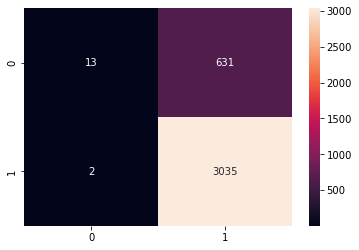

In [89]:
sns.heatmap(cm,annot=True,fmt='g')
plt.show()

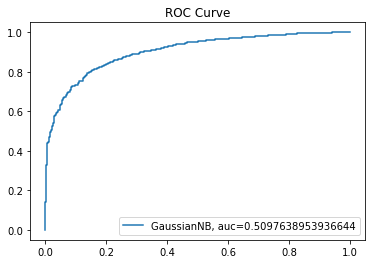

In [90]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = clf.predict_proba(x_test)[:,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_prob)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="GaussianNB, auc="+str(auc))
plt.legend()
plt.title("ROC Curve")
plt.show()

In [91]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: %.3f' % recall_score(y_test, y_pred))
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.3f' % f1_score(y_test, y_pred))

Precision:  0.8278777959629023
Recall: 0.999
Accuracy: 0.828
F1 Score: 0.906
